<a href="https://colab.research.google.com/github/SafaaFathii/Numerical-Optimization-GD/blob/main/notebooks/Practical_Session_1_GD_Implementation_for_LR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
df = pd.read_csv("RegData.csv",names=  ["X","Y"])
df

,X,Y
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


#### Explore your data

(13, 2)


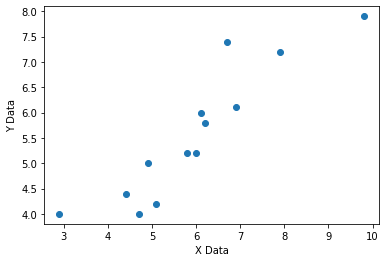

In [ ]:
print(df.shape)
plt.scatter(df["X"],df["Y"])
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

#### Explore your data

#### Plot the original data (scatter plot of X,y)

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

![image.png](attachment:image.png)

In [ ]:
theta_0 = 0
theta_1 = 0
alpha = 0.001


### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.![image.png](attachment:image.png)
#### Note: you will need to iterate through all data points

In [ ]:
def Hypo(theta_0,theta_1):
    df["YPredict"] = theta_0 + theta_1 * df["X"]
Hypo(theta_0,theta_1)

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
def CostFunc():
    sumii = sum(np.power(df["YPredict"]-df["Y"] , 2))
    totalCost = sumii/(2*df.shape[0])
    return totalCost
CostFunc()

16.305384479692318

### Step4: Calculate the gradient.![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
def Gradient_Theta():
    G_Theta_0 = sum(df["YPredict"]-df["Y"])/df.shape[0]
    G_Theta_1 = sum((df["YPredict"] - df["Y"])*df["X"])/df.shape[0]
    return G_Theta_0,G_Theta_1
Gradient_Theta()

(-5.569230739769231, -35.043846043215375)

### Step5: Update the parameters (simultaneously).![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)

In [ ]:
G_theta_0,G_Theta_1 = Gradient_Theta()
def UpdateParameters(theta_0,theta_1,G_theta_0,G_Theta_1):
    theta_0 -= alpha * G_theta_0
    theta_1 -= alpha * G_Theta_1
    return theta_0,theta_1
UpdateParameters(0,0,G_theta_0,G_Theta_1)


(0.005569230739769231, 0.03504384604321537)

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.![image.png](attachment:image.png)

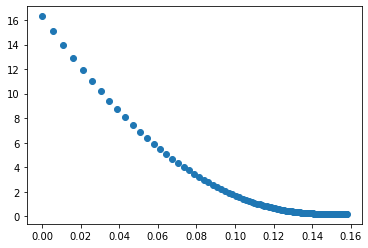

In [ ]:
theta_0 = 0
theta_1 = 0
alpha = 0.001
costList = []
theta_0_List = []
theta_1_List = []
for i in range(200):
    Hypo(theta_0,theta_1)
    theta_0_List.append(theta_0)
    theta_1_List.append(theta_1)
    total_Cost = CostFunc()
    costList.append(total_Cost)
    G_theta_0,G_Theta_1 = Gradient_Theta()
    theta_0,theta_1=UpdateParameters(theta_0,theta_1,G_theta_0,G_Theta_1)

plt.scatter(theta_0_List,costList)
plt.show()

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [ ]:
Hypo(theta_0,theta_1)
df

,X,Y,YPredict
0,2.9,4.0,2.749601
1,6.7,7.4,6.145545
2,4.9,5.0,4.536940
3,7.9,7.2,7.217949
4,9.8,7.9,8.915921
5,6.9,6.1,6.324279
6,6.1,6.0,5.609344
7,6.2,5.8,5.698710
8,6.0,5.2,5.519977
9,5.1,4.2,4.715674


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

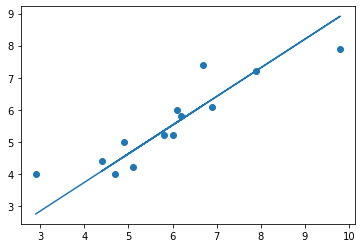

In [ ]:
plt.scatter(df["X"],df["Y"])
plt.plot(df["X"],df["YPredict"])
plt.show()

#### Use R2 score to evaluate LR equation output
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["YPredict"]))



0.7486565498171145


## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

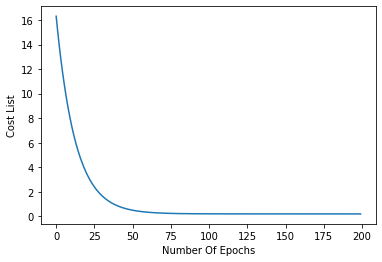

In [ ]:
plt.plot(range(200),costList)
plt.xlabel("Number Of Epochs")
plt.ylabel("Cost List")
plt.show()

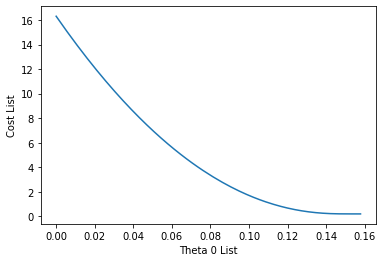

In [ ]:
plt.plot(theta_0_List,costList)
plt.xlabel("Theta 0 List")
plt.ylabel("Cost List")
plt.show()

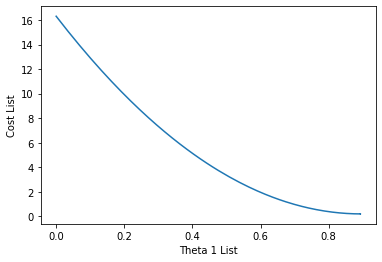

In [ ]:
plt.plot(theta_1_List,costList)
plt.xlabel("Theta 1 List")
plt.ylabel("Cost List")
plt.show()

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [ ]:
df = pd.read_csv("MultipleLR.csv", names = ['X1','X2','X3','Y'])
df

,X1,X2,X3,Y
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [ ]:
df.insert(0,"X0",1)
df

,X0,X1,X2,X3,Y
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142
5,1,53,46,55,101
6,1,69,74,77,149
7,1,47,56,60,115
8,1,87,79,90,175
9,1,79,70,88,164


In [ ]:
X = np.matrix(df.loc[:,["X0","X1","X2","X3"]])
Y = np.matrix( df.loc[:,["Y"]])
theta = np.matrix(np.array([0,0,0,0]))


In [ ]:

alpha=0.0001
theta_List = []
Cost_List =[]
temp = np.matrix(np.zeros(theta.shape))
thetas = int(theta.ravel().shape[1])
def MultiVar(theta,alpha):
    for i in range(100):
        Costt = (X * theta.T) - Y
        for j in range(thetas):
            g_theta = np.multiply(Costt , X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(g_theta))
        theta = temp
        theta_List.append(theta)
        Powerr = np.power(((X * theta.T)-Y) , 2)
        loss = np.sum(Powerr) / (2 * len(X))       
        Cost_List.append(loss)
    return theta
MultiVar(theta,0.0001)


matrix([[0.00789687, 0.61841652, 0.6192408 , 0.7523814 ]])

In [ ]:
df["YPredict"]=(X * theta.T)
df

,X0,X1,X2,X3,Y,YPredict
0,1,73,80,75,152,0
1,1,93,88,93,185,0
2,1,89,91,90,180,0
3,1,96,98,100,196,0
4,1,73,66,70,142,0
5,1,53,46,55,101,0
6,1,69,74,77,149,0
7,1,47,56,60,115,0
8,1,87,79,90,175,0
9,1,79,70,88,164,0


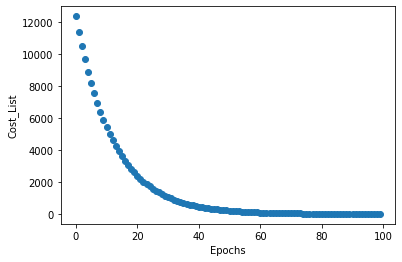

In [ ]:
plt.scatter(range(100), Cost_List)
plt.xlabel('Epochs')
plt.ylabel('Cost_List')
plt.show()

### Repeat your implementation but for more than one variable

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

#### Use R2 score to evaluate LR equation output

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["YPredict"], df["Y"]))


0.0


# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

#### Train the model (fit the model to the training data)

#### Predict y values using the trained model

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

### Repeat for Mulivariate